# **Task 1 - Prediction using Supervised ML**


---


Predicting the percentage of a student based on the number of study hours

Question - What will be the predicted score if a student studies for 9.25 hours/day?

by Namrata Kumari Singh

Importing the libraries

---



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

Reading the data

---



In [3]:
url="http://bit.ly/w-data"
data= pd.read_csv(url)
data.head(26)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Checking if the data is null

---



In [4]:
data.isnull==True

False

Plotting a scatter plot between marks scored and study hours

---



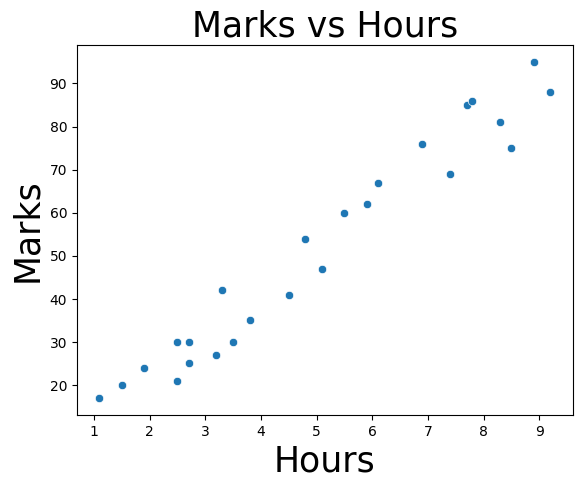

In [5]:
sns.scatterplot(y=data['Scores'], x=data['Hours'])
plt.title('Marks vs Hours', size=25)
plt.ylabel('Marks', size=25)
plt.xlabel('Hours', size=25)
plt.show()

As there appears to be a correlation between marks scored and study hours, plotting a regression line to confirm it.

---



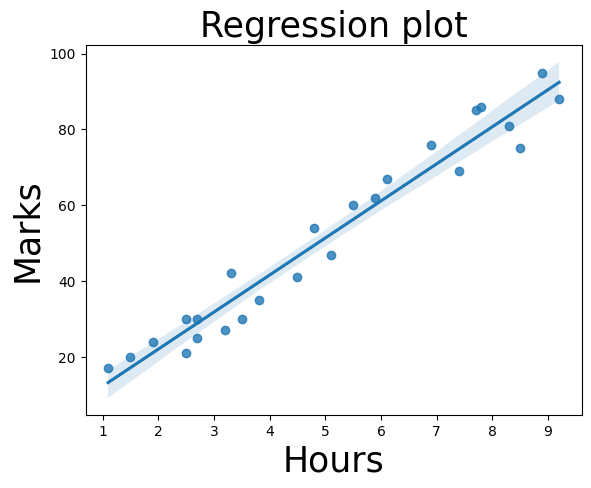

In [7]:
sns.regplot(x=data['Hours'], y=data['Scores'])
plt.title('Regression plot', size=25)
plt.ylabel('Marks', size=25)
plt.xlabel('Hours', size=25)
plt.show()

Printing the correlation between marks scored and study hours

---



In [8]:
print(data.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


**The data are positively correlated**

# Training the model


---



1. Splitting the data

In [9]:
X=data.iloc[:, :-1].values
Y=data.iloc[: ,1].values
train_X, val_X, train_Y, val_Y = train_test_split(X,Y, random_state=0)

2.Fitting the data into the model

In [10]:
regression=LinearRegression()
regression.fit(train_X, train_Y)
print("----Model Trained----")

----Model Trained----


# Predicting the percentage of marks scored


---



In [11]:
pred_y=regression.predict(val_X)
prediction=pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks':[k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


# Comparing the actual and predicted marks and plotting a graph


---



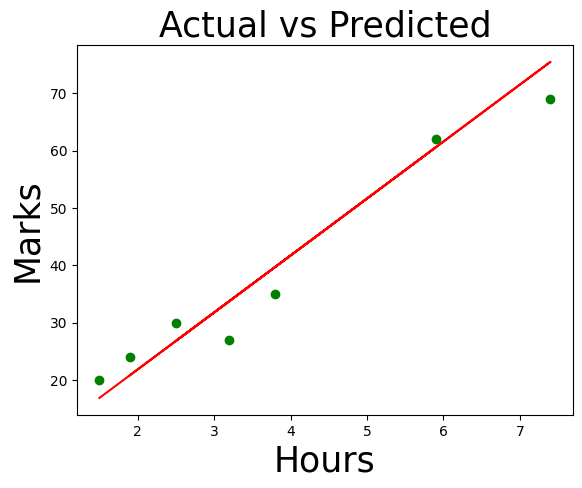

In [12]:
plt.scatter(x=val_X, y=val_Y, color='green')
plt.plot(val_X, pred_y, color='red')
plt.title('Actual vs Predicted', size=25)
plt.ylabel('Marks', size=25)
plt.xlabel('Hours', size=25)
plt.show()

# Evaluating the model


---



In [13]:
print(' Mean absolute error: ',mean_absolute_error(val_Y, pred_y))

 Mean absolute error:  4.130879918502482


# What will be the predicted score of a atudent if they study for 9.25 hours/day?


---



In [14]:
hours=[9.25]
answer=regression.predict([hours])
print("Score={}".format(round(answer[0],3)))

Score=93.893




# Conclusion

---
According to the regression model, if a student studies for 9.25 hours/day, they are likely to score 93.89 percentage.

The regression model gives a mean absolute error of 4.13
